In [29]:
#Import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [30]:
#Load the Dataset ***Note: You must change the path
Homes = pd.read_csv("RDC_Inventory_Core_Metrics_County_History 2.csv")

In [31]:
#Preview Dataset in Python
display(Homes.head())

,month_date_yyyymm,county_fips,county_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202403,48205,"hartley, tx",425000.0,0.1824,0.6915,12.0,-0.2500,-0.5102,161.0,...,444336.0,0.0990,0.3827,12.0,-0.2500,-0.5385,0.0833,NaN,0.0017,1.0
1,202403,27133,"rock, mn",309900.0,0.0376,0.2689,21.0,0.0244,-0.2500,53.0,...,397205.0,0.0321,0.2890,35.0,0.0145,0.1111,0.6190,-0.0395,0.2798,1.0
2,202403,40019,"carter, ok",199000.0,-0.0499,-0.0328,165.0,-0.0030,0.4865,61.0,...,306719.0,-0.0234,-0.0577,222.0,0.0207,0.2299,0.3576,0.0132,-0.2911,0.0
3,202403,42083,"mckean, pa",169000.0,-0.0663,0.3000,48.0,-0.0400,-0.1652,107.0,...,187270.0,-0.0467,0.2149,71.0,-0.1069,-0.1288,0.5208,-0.0892,0.1382,0.0
4,202403,1055,"etowah, al",248950.0,-0.0130,0.1609,236.0,0.0876,0.2826,50.0,...,296370.0,-0.0180,0.2054,303.0,0.0783,0.1744,0.2839,-0.0133,-0.1074,0.0


In [32]:
display(Homes.tail())

,month_date_yyyymm,county_fips,county_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
288380,201607,47057,"grainger, tn",169000.0,NaN,NaN,160.0,NaN,NaN,96.0,...,239423.0,NaN,NaN,177.0,NaN,NaN,0.1125,NaN,NaN,NaN
288381,201607,39119,"muskingum, oh",132900.0,NaN,NaN,368.0,NaN,NaN,75.0,...,170539.0,NaN,NaN,425.0,NaN,NaN,0.1522,NaN,NaN,NaN
288382,201607,20193,"thomas, ks",129250.0,NaN,NaN,21.0,NaN,NaN,64.0,...,138317.0,NaN,NaN,21.0,NaN,NaN,0.0000,NaN,NaN,NaN
288383,201607,49049,"utah, ut",341425.0,NaN,NaN,1951.0,NaN,NaN,43.0,...,482064.0,NaN,NaN,3689.0,NaN,NaN,0.8954,NaN,NaN,NaN
288384,201607,27009,"benton, mn",189700.0,NaN,NaN,142.0,NaN,NaN,55.0,...,227777.0,NaN,NaN,239.0,NaN,NaN,0.6831,NaN,NaN,NaN


In [33]:
Homes.shape

(288385, 40)

In [34]:
#Categorical Variables Clean: Split County Name and State Column
Homes[['county', 'state']] = Homes['county_name'].str.split(',', expand=True)

In [35]:
#Categorical Variables Clean: Split Year and Month
Homes['month_date_yyyymm'] = pd.Series(Homes['month_date_yyyymm'], dtype="string")
Homes['year'] = Homes['month_date_yyyymm'].str[0:4]
Homes['month'] = Homes['month_date_yyyymm'].str[-2:]

display(Homes.head())

,month_date_yyyymm,county_fips,county_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,county,state,year,month
0,202403,48205,"hartley, tx",425000.0,0.1824,0.6915,12.0,-0.2500,-0.5102,161.0,...,-0.2500,-0.5385,0.0833,NaN,0.0017,1.0,hartley,tx,2024,03
1,202403,27133,"rock, mn",309900.0,0.0376,0.2689,21.0,0.0244,-0.2500,53.0,...,0.0145,0.1111,0.6190,-0.0395,0.2798,1.0,rock,mn,2024,03
2,202403,40019,"carter, ok",199000.0,-0.0499,-0.0328,165.0,-0.0030,0.4865,61.0,...,0.0207,0.2299,0.3576,0.0132,-0.2911,0.0,carter,ok,2024,03
3,202403,42083,"mckean, pa",169000.0,-0.0663,0.3000,48.0,-0.0400,-0.1652,107.0,...,-0.1069,-0.1288,0.5208,-0.0892,0.1382,0.0,mckean,pa,2024,03
4,202403,1055,"etowah, al",248950.0,-0.0130,0.1609,236.0,0.0876,0.2826,50.0,...,0.0783,0.1744,0.2839,-0.0133,-0.1074,0.0,etowah,al,2024,03


In [36]:
#For the purpose of the proect we only need some of the columns.   We can select them and rename the data.
HomesCleaned = Homes[['year', 'month', 'county', 'state', 'median_listing_price', 'active_listing_count', 'median_days_on_market', 'new_listing_count', 
               'price_increased_count', 'price_reduced_count', 'pending_listing_count', 'median_square_feet', 'average_listing_price',
               'total_listing_count']] 

display(HomesCleaned.head())

,year,month,county,state,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_square_feet,average_listing_price,total_listing_count
0,2024,03,hartley,tx,425000.0,12.0,161.0,0.0,0.0,0.0,1.0,3024.0,444336.0,12.0
1,2024,03,rock,mn,309900.0,21.0,53.0,8.0,0.0,0.0,13.0,2016.0,397205.0,35.0
2,2024,03,carter,ok,199000.0,165.0,61.0,56.0,0.0,40.0,59.0,1633.0,306719.0,222.0
3,2024,03,mckean,pa,169000.0,48.0,107.0,12.0,0.0,8.0,25.0,1898.0,187270.0,71.0
4,2024,03,etowah,al,248950.0,236.0,50.0,128.0,0.0,60.0,67.0,1894.0,296370.0,303.0


In [37]:
display(HomesCleaned.tail())

,year,month,county,state,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_square_feet,average_listing_price,total_listing_count
288380,2016,07,grainger,tn,169000.0,160.0,96.0,24.0,0.0,20.0,18.0,1620.0,239423.0,177.0
288381,2016,07,muskingum,oh,132900.0,368.0,75.0,116.0,12.0,100.0,56.0,1714.0,170539.0,425.0
288382,2016,07,thomas,ks,129250.0,21.0,64.0,4.0,0.0,0.0,0.0,1620.0,138317.0,21.0
288383,2016,07,utah,ut,341425.0,1951.0,43.0,1128.0,112.0,716.0,1747.0,3332.0,482064.0,3689.0
288384,2016,07,benton,mn,189700.0,142.0,55.0,80.0,8.0,64.0,97.0,1882.0,227777.0,239.0


In [38]:
#Add Proportions for Categorical Counts
Homes['new_listing_Prop'] = Homes['new_listing_count'] / Homes['total_listing_count']
Homes.new_listing_Prop.head()

0    0.000000
1    0.228571
2    0.252252
3    0.169014
4    0.422442
Name: new_listing_Prop, dtype: float64

In [39]:
Homes['price_reduced_Prop'] = Homes['price_reduced_count'] / Homes['total_listing_count']
Homes.price_reduced_Prop.head()

0    0.000000
1    0.000000
2    0.180180
3    0.112676
4    0.198020
Name: price_reduced_Prop, dtype: float64

In [40]:
Homes['price_increased_Prop'] = Homes['price_increased_count'] / Homes['total_listing_count']
Homes.price_increased_Prop.tail()

288380    0.000000
288381    0.028235
288382    0.000000
288383    0.030361
288384    0.033473
Name: price_increased_Prop, dtype: float64

In [41]:
Homes['pending_listing_Prop'] = Homes['pending_listing_count'] / Homes['total_listing_count']
Homes.pending_listing_Prop.head()

0    0.083333
1    0.371429
2    0.265766
3    0.352113
4    0.221122
Name: pending_listing_Prop, dtype: float64

In [42]:
Homes['active_listing_Prop'] = Homes['active_listing_count'] / Homes['total_listing_count']
Homes.active_listing_Prop.head()

0    1.000000
1    0.600000
2    0.743243
3    0.676056
4    0.778878
Name: active_listing_Prop, dtype: float64

In [43]:
HomesEnriched = Homes[['year', 'month', 'county', 'state', 'median_listing_price', 'active_listing_Prop', 'median_days_on_market', 'new_listing_Prop', 
               'price_increased_Prop', 'price_reduced_Prop', 'pending_listing_Prop', 'median_square_feet', 'average_listing_price',
               'total_listing_count']] 
HomesEnriched.head()

,year,month,county,state,median_listing_price,active_listing_Prop,median_days_on_market,new_listing_Prop,price_increased_Prop,price_reduced_Prop,pending_listing_Prop,median_square_feet,average_listing_price,total_listing_count
0,2024,03,hartley,tx,425000.0,1.000000,161.0,0.000000,0.0,0.000000,0.083333,3024.0,444336.0,12.0
1,2024,03,rock,mn,309900.0,0.600000,53.0,0.228571,0.0,0.000000,0.371429,2016.0,397205.0,35.0
2,2024,03,carter,ok,199000.0,0.743243,61.0,0.252252,0.0,0.180180,0.265766,1633.0,306719.0,222.0
3,2024,03,mckean,pa,169000.0,0.676056,107.0,0.169014,0.0,0.112676,0.352113,1898.0,187270.0,71.0
4,2024,03,etowah,al,248950.0,0.778878,50.0,0.422442,0.0,0.198020,0.221122,1894.0,296370.0,303.0


In [44]:
HomesEnriched.tail()

,year,month,county,state,median_listing_price,active_listing_Prop,median_days_on_market,new_listing_Prop,price_increased_Prop,price_reduced_Prop,pending_listing_Prop,median_square_feet,average_listing_price,total_listing_count
288380,2016,07,grainger,tn,169000.0,0.903955,96.0,0.135593,0.000000,0.112994,0.101695,1620.0,239423.0,177.0
288381,2016,07,muskingum,oh,132900.0,0.865882,75.0,0.272941,0.028235,0.235294,0.131765,1714.0,170539.0,425.0
288382,2016,07,thomas,ks,129250.0,1.000000,64.0,0.190476,0.000000,0.000000,0.000000,1620.0,138317.0,21.0
288383,2016,07,utah,ut,341425.0,0.528870,43.0,0.305774,0.030361,0.194091,0.473570,3332.0,482064.0,3689.0
288384,2016,07,benton,mn,189700.0,0.594142,55.0,0.334728,0.033473,0.267782,0.405858,1882.0,227777.0,239.0


In [45]:
#Find missing Values
mean = HomesEnriched.mean(numeric_only=True)
HomesEnriched.fillna(value=mean, inplace=True)

In [46]:
HomesEnriched['median_days_on_market'] = HomesEnriched['median_days_on_market'].astype(int)
print(type('median_days_on_market'))

<class 'str'>


In [47]:
print("Unique MDOM Count: " +str(HomesEnriched.median_days_on_market.nunique()))
print(HomesEnriched.median_days_on_market.value_counts())

Unique MDOM Count: 364
median_days_on_market
59     4157
58     4120
52     4097
51     4031
61     4003
       ... 
311       1
326       1
321       1
345       1
343       1
Name: count, Length: 364, dtype: int64


In [48]:
def conditions(s):
    if s['median_days_on_market'] <= 45:
        return 'Rapid'
    if 46 <= s['median_days_on_market'] <= 90:
        return 'Normal'
    if s['median_days_on_market'] in [91, 145]:
        return 'Long'
    else: 
        return 'Stale'

HomesEnriched['median_market_time'] = HomesEnriched.apply(conditions, axis=1)
HomesEnriched.head()

,year,month,county,state,median_listing_price,active_listing_Prop,median_days_on_market,new_listing_Prop,price_increased_Prop,price_reduced_Prop,pending_listing_Prop,median_square_feet,average_listing_price,total_listing_count,median_market_time
0,2024,03,hartley,tx,425000.0,1.000000,161,0.000000,0.0,0.000000,0.083333,3024.0,444336.0,12.0,Stale
1,2024,03,rock,mn,309900.0,0.600000,53,0.228571,0.0,0.000000,0.371429,2016.0,397205.0,35.0,Normal
2,2024,03,carter,ok,199000.0,0.743243,61,0.252252,0.0,0.180180,0.265766,1633.0,306719.0,222.0,Normal
3,2024,03,mckean,pa,169000.0,0.676056,107,0.169014,0.0,0.112676,0.352113,1898.0,187270.0,71.0,Stale
4,2024,03,etowah,al,248950.0,0.778878,50,0.422442,0.0,0.198020,0.221122,1894.0,296370.0,303.0,Normal


In [49]:
#change the create new column from month using the as four seasons
def conditions(row):
    month = int(row['month'])  # Convert to int here
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

HomesEnriched['month'] = HomesEnriched['month'].str.replace('o', '').astype(int)  # Convert the entire column before applying the function
HomesEnriched['season'] = HomesEnriched.apply(conditions, axis=1)
HomesEnriched.season.shape
HomesEnriched.tail()

,year,month,county,state,median_listing_price,active_listing_Prop,median_days_on_market,new_listing_Prop,price_increased_Prop,price_reduced_Prop,pending_listing_Prop,median_square_feet,average_listing_price,total_listing_count,median_market_time,season
288380,2016,7,grainger,tn,169000.0,0.903955,96,0.135593,0.000000,0.112994,0.101695,1620.0,239423.0,177.0,Stale,Summer
288381,2016,7,muskingum,oh,132900.0,0.865882,75,0.272941,0.028235,0.235294,0.131765,1714.0,170539.0,425.0,Normal,Summer
288382,2016,7,thomas,ks,129250.0,1.000000,64,0.190476,0.000000,0.000000,0.000000,1620.0,138317.0,21.0,Normal,Summer
288383,2016,7,utah,ut,341425.0,0.528870,43,0.305774,0.030361,0.194091,0.473570,3332.0,482064.0,3689.0,Rapid,Summer
288384,2016,7,benton,mn,189700.0,0.594142,55,0.334728,0.033473,0.267782,0.405858,1882.0,227777.0,239.0,Normal,Summer


In [50]:
#create uniqu count for season
print("Unique Season Count: " +str(HomesEnriched.season.nunique()))
print(HomesEnriched.season.value_counts())

Unique Season Count: 4
season
Fall      74462
Winter    74394
Summer    71331
Spring    68198
Name: count, dtype: int64


In [51]:

# Calculate summary statistics for the weight feature
round(HomesEnriched.describe())

,month,median_listing_price,active_listing_Prop,median_days_on_market,new_listing_Prop,price_increased_Prop,price_reduced_Prop,pending_listing_Prop,median_square_feet,average_listing_price,total_listing_count
count,288385.0,288385.0,288385.0,288385.0,288385.0,288385.0,288385.0,288385.0,288385.0,288385.0,288385.0
mean,7.0,252879.0,1.0,75.0,inf,inf,inf,0.0,1875.0,350860.0,430.0
std,3.0,210886.0,0.0,36.0,NaN,NaN,NaN,0.0,407.0,470721.0,1259.0
min,1.0,1311.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,5000.0,0.0
25%,3.0,140000.0,1.0,50.0,0.0,0.0,0.0,0.0,1629.0,181522.0,36.0
50%,7.0,204475.0,1.0,69.0,0.0,0.0,0.0,0.0,1828.0,266801.0,105.0
75%,10.0,307450.0,1.0,93.0,0.0,0.0,0.0,0.0,2055.0,403009.0,322.0
max,12.0,13000000.0,3.0,365.0,inf,inf,inf,6.0,30902.0,142882807.0,33577.0


In [76]:
#cut the outliers
HomesEnriched = HomesEnriched[HomesEnriched['median_listing_price'] < 5000000]


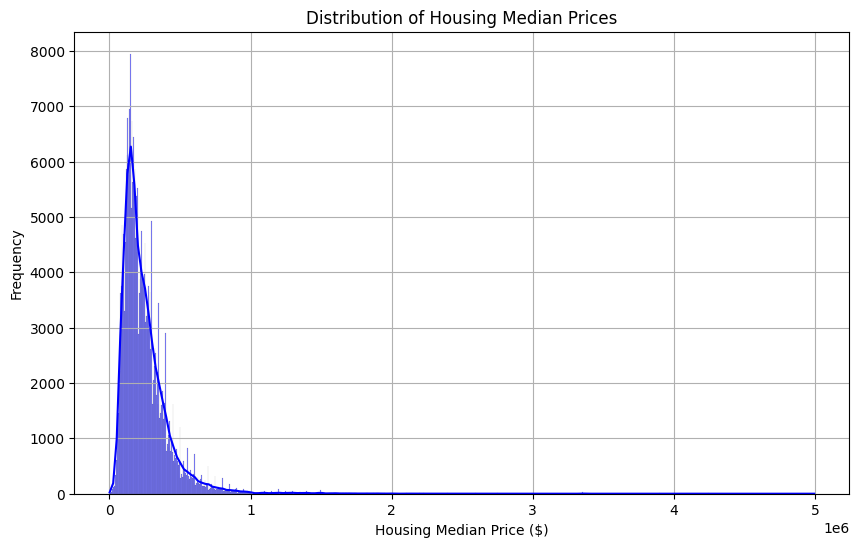

In [77]:
# Distribution of Housing Median Prices
plt.figure(figsize=(10, 6))
sns.histplot(HomesEnriched['median_listing_price'], kde=True, color='blue')
plt.title('Distribution of Housing Median Prices')
plt.xlabel('Housing Median Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [71]:
# Calculate quantiles
quantiles = HomesEnriched['median_listing_price'].quantile([0.33, 0.66])
low_threshold, high_threshold = quantiles[0.33], quantiles[0.66]

# Assign categories based on quantiles
HomesEnriched['price_category'] = pd.cut(HomesEnriched['median_listing_price'],
                                bins=[HomesEnriched['median_listing_price'].min(), low_threshold, high_threshold, HomesEnriched['median_listing_price'].max()],
                                labels=['Low', 'Medium', 'High'])

In [73]:
# save to csv
HomesEnriched.to_csv('HomesEnriched.csv', index=False)


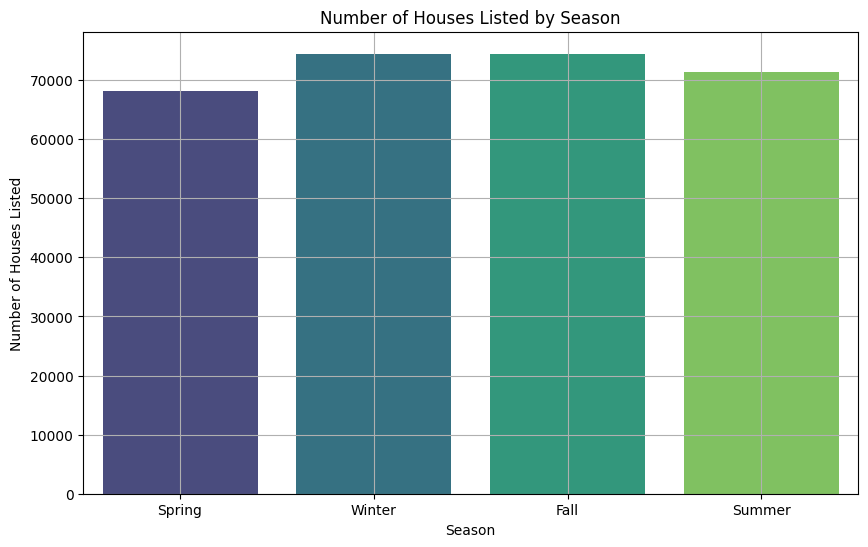

In [75]:
# what is good season to list your house
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=HomesEnriched, palette='viridis')
plt.title('Number of Houses Listed by Season')
plt.xlabel('Season')
plt.ylabel('Number of Houses Listed')
plt.grid(True)
plt.show()


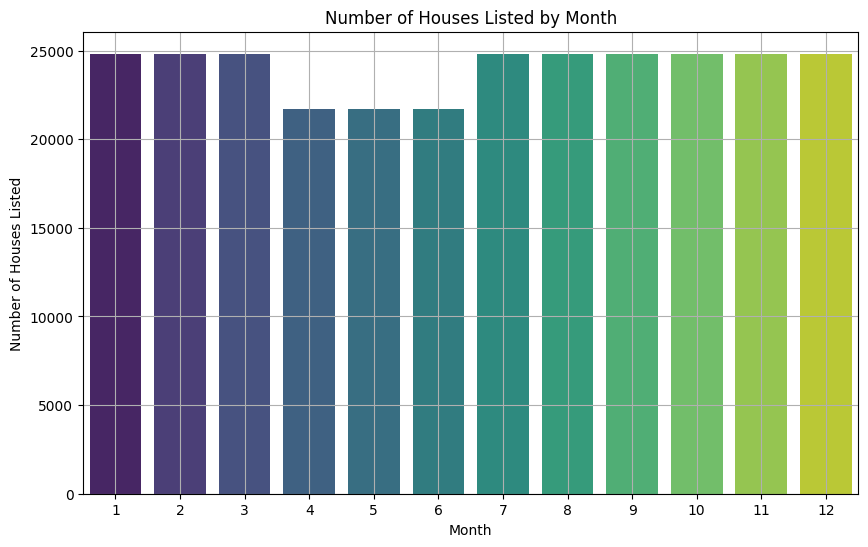

In [78]:
# Time of the year is less competitive
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=HomesEnriched, palette='viridis')
plt.title('Number of Houses Listed by Month')
plt.xlabel('Month')
plt.ylabel('Number of Houses Listed')
plt.grid(True)
plt.show()


In [ ]:
#